<a href="https://colab.research.google.com/github/0Park/Deeplearning-NLP/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import layers
from keras import models

In [ ]:

import keras
keras.__version__

'2.4.3'

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
train_images=train_images.reshape((60000,28,28,1))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000,28,28,1))
test_images=test_images.astype('float32')/255

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5,batch_size=64)


11493376/11490434 [==============================] - 1s 0us/step
Epoch 1/5
938/938 [==============================] - 42s 44ms/step - loss: 0.1653 - accuracy: 0.9481
Epoch 2/5
938/938 [==============================] - 41s 44ms/step - loss: 0.0460 - accuracy: 0.9864
Epoch 3/5
938/938 [==============================] - 41s 44ms/step - loss: 0.0315 - accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 42s 44ms/step - loss: 0.0239 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 42s 44ms/step - loss: 0.0193 - accuracy: 0.9941


In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
test_acc

313/313 [==============================] - 3s 8ms/step - loss: 0.0257 - accuracy: 0.9926


0.9926000237464905

In [ ]:
model_no_max_pool=models.Sequential()
model_no_max_pool.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model_no_max_pool.add(layers.Conv2D(64,(3,3),activation='relu'))
model_no_max_pool.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
model_no_max_pool.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# CNN을 사용하여 개와 고양이 분류하기

In [ ]:
import os,shutil
original_dataset_dir='/content/drive/My Drive/dataset/train' # 원본 데이터셋을 압축 해제한 디렉터리 경로
base_dir='/content/drive/My Drive/dataset/cats_and_dogs_small'
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir=os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir=os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir=os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir=os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir=os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir=os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(train_cats_dir,fname)
  shutil.copyfile(src,dst)

fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src,dst)

fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(test_cats_dir,fname)
  shutil.copyfile(src,dst)

fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src,dst)

fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(src,dst)

fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src=os.path.join(original_dataset_dir,fname)
  dst=os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src,dst)
  



FileExistsError: ignored

In [ ]:
import os

original_dataset_dir='/content/drive/My Drive/dataset/train' # 원본 데이터셋을 압축 해제한 디렉터리 경로
base_dir='/content/drive/My Drive/dataset/cats_and_dogs_small'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

test_cats_dir=os.path.join(test_dir,'cats')
test_dogs_dir=os.path.join(test_dir,'dogs')

In [ ]:
print('훈련용 고양이 이미지 전체 개수:',len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [ ]:
print('훈련용 강아지 이미지 전체 개수:',len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:',len(os.listdir(validation_cats_dir)))

훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500


In [ ]:
print(len(os.listdir(validation_dogs_dir)))

500


In [ ]:
# 강아지 vs 고양이 분류를 위한 소규모 컨브넷 만들기
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
# 훈련 설정하기
from keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [ ]:
# ImageDataGenerator를 사용하여 디렉터리에서 이미지 읽기
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)   #스케일 조정하기

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch,labels_batch in train_generator:
  print('배치 데이터 크기:',data_batch.shape)
  print('배치 레이블 크기:',labels_batch.shape)
  break


배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [ ]:
# 배치 제너레이터를 사용하여 모델 훈련하기
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
 20/100 [=====>........................] - ETA: 2:13 - loss: 0.7004 - acc: 0.4663

KeyboardInterrupt: ignored

In [ ]:
#모델 저장하기
model.save('cats_and_dogs_small_1.h5')

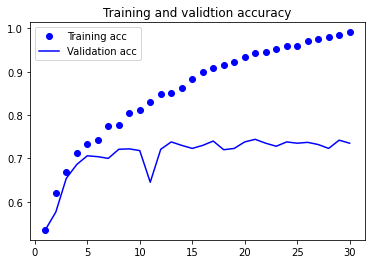

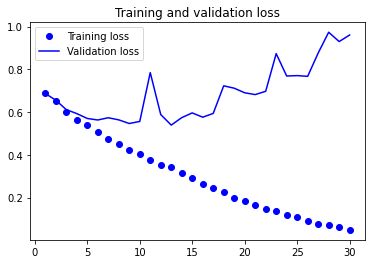

In [ ]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validtion accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
datagen =ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')

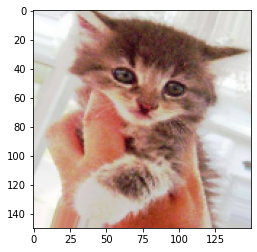

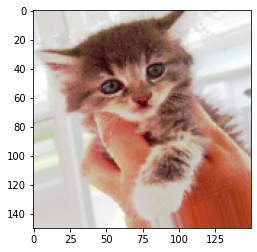

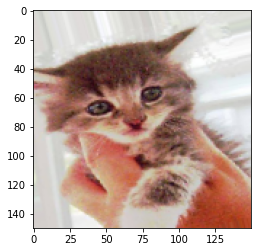

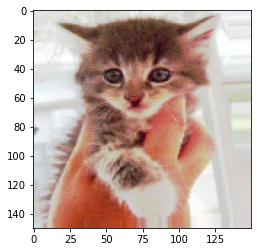

In [ ]:
# 랜덤하게 증식된 훈련이미지 그리기
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames=sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])
img_path=fnames[3] # 증식할 이미지를 선택합니다
img=image.load_img(img_path,target_size=(150,150)) #이미지 불러오기
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)

i=0
for batch in datagen.flow(x,batch_size=1):
  plt.figure(i)
  imgplot=plt.imshow(image.array_to_img(batch[0]))
  i+=1
  if i%4==0:
    break
plt.show()

In [ ]:
#드롭아웃을 포함한 새로운 컨브넷 정의하기
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])


In [ ]:
# 데이터 증식 제너레이터를 사용하여 컨브넷 훈련하기
from keras.preprocessing.image import ImageDataGenerator
batch_size=32
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255) #검증 데이터는 증식X
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=batch_size,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=batch_size,class_mode='binary')
history=model.fit_generator(train_generator,steps_per_epoch=2000//batch_size,epochs=50,validation_data=validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
62/62 [==============================] - 113s 2s/step - loss: 0.5831 - acc: 0.6926 - val_loss: 0.6119 - val_acc: 0.6550
Epoch 2/50
62/62 [==============================] - 113s 2s/step - loss: 0.5923 - acc: 0.6814 - val_loss: 0.5770 - val_acc: 0.6870
Epoch 3/50
62/62 [==============================] - 113s 2s/step - loss: 0.5789 - acc: 0.6890 - val_loss: 0.5345 - val_acc: 0.7250
Epoch 4/50
62/62 [==============================] - 113s 2s/step - loss: 0.5752 - acc: 0.7043 - val_loss: 0.5552 - val_acc: 0.7120
Epoch 5/50
62/62 [==============================] - 113s 2s/step - loss: 0.5689 - acc: 0.6992 - val_loss: 0.5321 - val_acc: 0.7270
Epoch 6/50
62/62 [==============================] - 114s 2s/step - loss: 0.5636 - acc: 0.7012 - val_loss: 0.5364 - val_acc: 0.7250
Epoch 7/50
62/62 [==============================] - 113s 2s/step - loss: 0.5637 - acc: 0.7134 - val_loss: 0.5441 - val_acc: 0.7040

In [ ]:
model.save('cats_and_dogs_small2.h5')

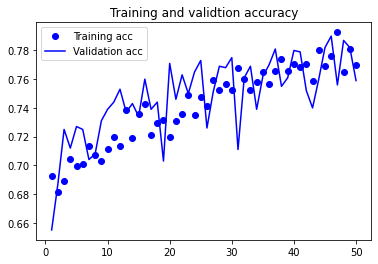

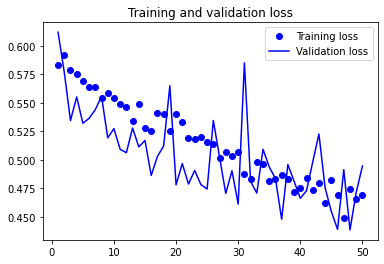

In [ ]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validtion accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# VGG 16합성곱 기반 층 만들기
from keras.applications import VGG16

conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
# 사전 훈련된 합성곱 기반 층을 사용한 특성 추출하기
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir='/content/drive/My Drive/dataset/cats_and_dogs_small'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

datagen=ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory,sample_count):
  features=np.zeros(shape=(sample_count,4,4,512))
  labels=np.zeros(shape=(sample_count))
  generator=datagen.flow_from_directory(directory,target_size=(150,150),batch_size=batch_size,class_mode='binary')

  i=0
  for inputs_batch, labels_batch in generator:
    features_batch=conv_base.predict(inputs_batch)
    features[i*batch_size:(i+1)*batch_size]=features_batch
    labels[i*batch_size:(i+1)*batch_size]=labels_batch
    i+=1
    if i*batch_size >= sample_count:
      break
      # 제너레이터 중지

  return features, labels

train_features,train_labels=extract_features(train_dir,2000)
validation_features,validation_labels=extract_features(validation_dir,1000)
test_features,test_labels=extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_features=np.reshape(train_features,(2000,4*4*512))
validation_features=np.reshape(validation_features,(1000,4*4*512))
test_features=np.reshape(test_features,(1000,4*4*512))


In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])
hitory=model.fit(train_features,train_labels,epochs=30,batch_size=20,validation_data=(validation_features,validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 23ms/step - loss: 0.5947 - acc: 0.6780 - val_loss: 0.4376 - val_acc: 0.8280
Epoch 2/30
100/100 [==============================] - 2s 21ms/step - loss: 0.4372 - acc: 0.8020 - val_loss: 0.3637 - val_acc: 0.8560
Epoch 3/30
100/100 [==============================] - 2s 21ms/step - loss: 0.3600 - acc: 0.8440 - val_loss: 0.3270 - val_acc: 0.8600
Epoch 4/30
100/100 [==============================] - 2s 21ms/step - loss: 0.3122 - acc: 0.8765 - val_loss: 0.3015 - val_acc: 0.8740
Epoch 5/30
100/100 [==============================] - 2s 21ms/step - loss: 0.2839 - acc: 0.8875 - val_loss: 0.2879 - val_acc: 0.8730
Epoch 6/30
100/100 [==============================] - 2s 21ms/step - loss: 0.2646 - acc: 0.8930 - val_loss: 0.2748 - val_acc: 0.8850
Epoch 7/30
100/100 [==============================] - 2s 21ms/step - loss: 0.2389 - acc: 0.9080 - val_loss: 0.2664 - val_acc: 0.8850
Epoch 8/30
100/100 [==============================] - 2s 21ms/step - 

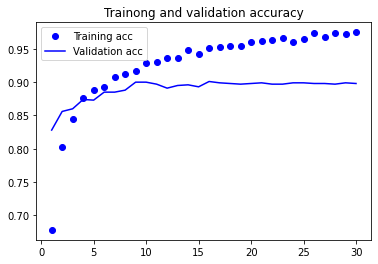

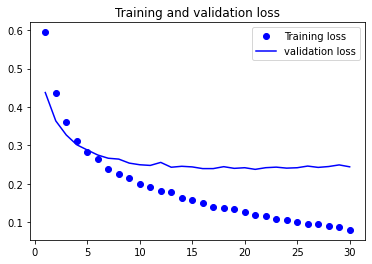

In [ ]:
import matplotlib.pyplot as plt

acc=hitory.history['acc']
val_acc=hitory.history['val_acc']
loss=hitory.history['loss']
val_loss=hitory.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Trainong and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('conv_base를 동결하기전 훈련되는 가중치의 수:',len(model.trainable_weights))
conv_base.trainable=False
print('conv_base를 동결한 후 훈련되는 가중치의 수:',len(model.trainable_weights))

conv_base를 동결하기전 훈련되는 가중치의 수: 30
conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50,verbose=2)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 - 653s - loss: 0.4636 - acc: 0.8015 - val_loss: 0.3661 - val_acc: 0.8560
Epoch 2/30


KeyboardInterrupt: ignored

In [ ]:
from keras.models import load_model
model=load_model('/content/drive/My Drive/dataset/cats_and_dogs_small/cats_and_dogs_small2.h5')

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
img_path='/content/drive/My Drive/dataset/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img=image.load_img(img_path,target_size=(150,150))
img_tensor=image.img_to_array(img)
img_tensor=np.expand_dims(img_tensor,axis=0)
img_tensor/=255.
print(img_tensor.shape)

(1, 150, 150, 3)


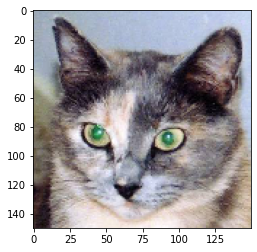

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
layer_outputs=[layer.output for layer in model.layers[:8]]
activation_model=models.Model(inputs=model.input,outputs=layer_outputs)

In [ ]:
activations=activation_model.predict(img_tensor)

In [ ]:
first_layer_activation=activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


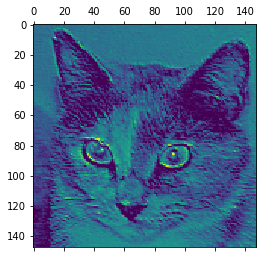

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0,:,:,19],cmap='viridis')

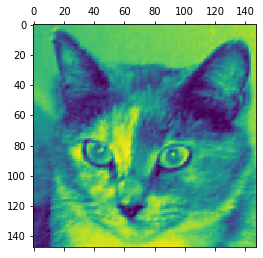

In [ ]:
plt.matshow(first_layer_activation[0,:,:,15],cmap='viridis')


In [ ]:
layer_names=[]
for layer in model.layers[:8]:
  layer_names.append(layer.name)
images_per_row=16

for layer_name, layer_activation in zip(layer_names,activations):
  n_features=layer_activation.shape[-1] # 특성 맵에 있는 특성의 수
  size=layer_activation.shape[1]  # 특성맵의 크기

  n_cols=n_features//images_per_row # 그리드 크기
  display_grid=np.zeros((size*n_cols,images_per_row*size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image=layer_activation[0,:,:,col*images_per_row+row]
      channel_image-=channel_image.mean() # 그래프로 나타내기 좋게 특성을 처리합니다.
      channel_image /= channel_image.std()
      channel_image*=64
      channel_image+=128
      channel_image=np.clip(channel_image,0,255).astype('uint8')
      display_grid[col*size:(col+1)*size,row*size:(row+1)*size]=channel_image
      scale=1./size
      plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid.shape[0]))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid,aspect='auto',cmap='viridis')
      plt.show()

In [ ]:
from keras.applications import VGG16
from keras import backend as K